# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
%matplotlib inline

In [3]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#define query url
units = "imperial"
api_key = weather_api_key
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#print(query_url)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:

#create empty lists for data
city_two = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#create counter
record = 0
set = 1
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if record > 48:
            record = 1
            set += 1
            city_two.append(city)
        else: 
            record +=1
            city_two.append(city)
    
        print(f'Processing Record {record} of Set {set} | {city}')
    except Exception:
        print(f'City not found. Skipping...')
print(f'----------------------------- \n Data Retrieval Complete \n -----------------------------')


Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | santa maria
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | teahupoo
Processing Record 12 of Set 1 | jamestown
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | namatanai
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | svarstad
City not found. Skipping...
Processing Record 22 of Set 1 | atuona
Processing Record 23 of Set 1 | mizdah

Processing Record 41 of Set 4 | asfi
Processing Record 42 of Set 4 | yzeure
Processing Record 43 of Set 4 | bubaque
Processing Record 44 of Set 4 | mehamn
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | victoria
City not found. Skipping...
Processing Record 48 of Set 4 | natal
Processing Record 49 of Set 4 | kaeo
Processing Record 1 of Set 5 | takoradi
Processing Record 2 of Set 5 | bryan
Processing Record 3 of Set 5 | amapa
Processing Record 4 of Set 5 | bhabua
Processing Record 5 of Set 5 | praia
Processing Record 6 of Set 5 | oxford
Processing Record 7 of Set 5 | klaksvik
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | waling
Processing Record 10 of Set 5 | elat
Processing Record 11 of Set 5 | opuwo
Processing Record 12 of Set 5 | lavrentiya
Processing Record 13 of Set 5 | porto novo
Processing Record 14 of Set 5 | khetri
Processing Record 15 of Set 5 | tateyama
Processing Record 16 of Set 5 |

Processing Record 38 of Set 8 | tingi
Processing Record 39 of Set 8 | fergus falls
Processing Record 40 of Set 8 | japura
Processing Record 41 of Set 8 | qaqortoq
Processing Record 42 of Set 8 | panjab
Processing Record 43 of Set 8 | molina
Processing Record 44 of Set 8 | santa cruz
Processing Record 45 of Set 8 | sola
Processing Record 46 of Set 8 | saint george
Processing Record 47 of Set 8 | chagoda
Processing Record 48 of Set 8 | arinos
Processing Record 49 of Set 8 | grand gaube
Processing Record 1 of Set 9 | sete lagoas
Processing Record 2 of Set 9 | tautira
Processing Record 3 of Set 9 | shugurovo
Processing Record 4 of Set 9 | mar del plata
Processing Record 5 of Set 9 | krasnyy oktyabr
Processing Record 6 of Set 9 | dalby
Processing Record 7 of Set 9 | talcahuano
Processing Record 8 of Set 9 | koulamoutou
Processing Record 9 of Set 9 | belyy yar
Processing Record 10 of Set 9 | waddan
Processing Record 11 of Set 9 | karacabey
Processing Record 12 of Set 9 | antofagasta
Processi

Processing Record 29 of Set 12 | tulun
Processing Record 30 of Set 12 | leshukonskoye
Processing Record 31 of Set 12 | san vicente
Processing Record 32 of Set 12 | brigantine
----------------------------- 
 Data Retrieval Complete 
 -----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create a dictionary, then dataframe
data = pd.DataFrame ({"City": city_two,
            "Country": country,
            "Lat": lat,
            "Lon": lon,
            "Max Temp": max_temp,
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed,
            "Date": date})
#drop any cities that were skipped
data = data.dropna(how="any")
#print(data.count())

#Export file into csv
data.to_csv("../output_data/city_weather_data.csv", index=False)

#display dataframe
weather_data = pd.read_csv("../output_data/city_weather_data.csv")

weather_data = pd.DataFrame(weather_data)
#print(data.head())
weather_data.head()

,City,Country,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,caravelas,BR,-17.7125,-39.2481,77.99,79,86,4.56,1666716802
1,hermanus,ZA,-34.4187,19.2345,62.80,80,48,9.46,1666716803
2,santa maria,BR,-29.6842,-53.8069,78.10,50,0,11.50,1666716763
3,bluff,NZ,-46.6000,168.3333,43.56,86,100,10.11,1666716803
4,rikitea,PF,-23.1203,-134.9692,72.75,77,65,19.91,1666716804


In [7]:
mean_data = data.mean()
mean_data.head()

Lat           19.894263
Lon           16.859677
Max Temp      61.160508
Humidity      70.059545
Cloudiness    58.339755
dtype: float64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
data_statistics = data.describe()
data_statistics_df = pd.DataFrame(data_statistics)
data_statistics_df

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,19.894263,16.859677,61.160508,70.059545,58.339755,7.647513,1.666717e+09
std,33.588038,90.241626,22.029678,20.967309,37.695923,5.452792,9.794016e+01
min,-54.800000,-179.166700,-15.920000,6.000000,0.000000,0.000000,1.666716e+09
25%,-8.166550,-58.847950,45.700000,59.000000,20.000000,3.455000,1.666717e+09
50%,25.286700,19.934800,66.270000,74.000000,71.000000,5.990000,1.666717e+09
75%,48.778550,97.361400,78.155000,86.000000,98.000000,10.360000,1.666717e+09
max,78.218600,179.316700,101.730000,100.000000,100.000000,34.180000,1.666717e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity100 = data[data['Humidity'] >= 100].index.tolist()
humidity100
#list(humidity100.index.values)#

[114, 179, 212, 307, 443, 458, 505]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

humidity_outlier = data["Humidity"]
quartiles = humidity_outlier.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print(lower_bound)
#print(upper_bound)
clean_city_data = data[(data["Humidity"] > lower_bound) & (data["Humidity"] < upper_bound)]
#humidity_outliers
clean_city_data = pd.DataFrame(clean_city_data)
#Print main city count
print(len(data))
#Print count main - outliers
print(len(clean_city_data))

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_outliers = data[(data["Humidity"] < lower_bound) | (data["Humidity"] > upper_bound)].index.tolist()
#print number of outliers
print(len(clean_city_data_outliers))
print(clean_city_data_outliers)

571
560
11
[88, 101, 177, 221, 225, 251, 269, 315, 355, 405, 522]


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

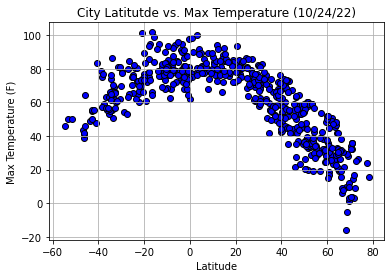

In [11]:
#clean_city_data.plot(kind="scatter", 
#                     x="Lat", 
#                     y="Max Temp",
#                     marker="o",
#                     facecolor="blue",
#                     edgecolor="black", 
#                     title="Latitude vs. Max Temperature (10/24/22)")
#plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker = "o", facecolor="blue", edgecolor = "black")
x = clean_city_data["Lat"]
y = clean_city_data["Max Temp"]
plt.scatter(x, y, marker = "o", facecolor="blue", edgecolor = "black")
plt.grid()

plt.title('City Latitutde vs. Max Temperature (10/24/22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.show()
#plt.savefig("../Images/lat_max_temp.png")


## Latitude vs. Humidity Plot

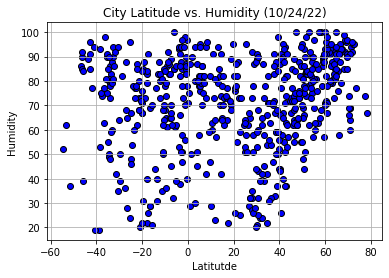

In [12]:
#plt.scatter(lat,humidity, marker = "o", facecolors = "blue", edgecolors = "black")
#plt.show()
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], facecolors = "blue", edgecolors = "black")
plt.xlabel("Latitutde")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (10/24/22)")
#clean_city_data.plot(kind="scatter", 
#                     x="Lat", 
#                     y="Humidity",
#                     marker="o",
#                     facecolor="blue",
#                     edgecolor="black", 
#                     title="Latitude vs. Humidity")
#plt.savefig("../Images/lat_humidity.png")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

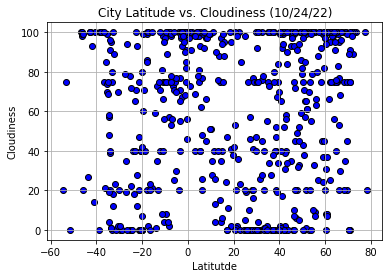

In [13]:
#lat_clouds = clean_city_data.plot(kind="scatter", 
#                     x="Lat", 
#                     y="Cloudiness",
#                     marker="o",
#                     facecolor="blue",
#                     edgecolor="black", 
#                     title="City Latitude vs. Cloudiness (04/01/20)")
#plt.savefig("../Images/lat_clouds.png")
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], facecolors = "blue", edgecolors = "black")
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (10/24/22)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

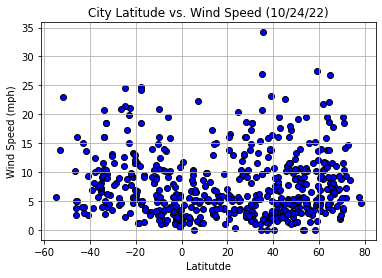

In [14]:
#lat_wind = clean_city_data.plot(kind="scatter", 
#                     x="Lat", 
#                     y="Wind Speed",
#                     marker="o",
#                     facecolor="blue",
#                     edgecolor="black", 
#                     title="City Latitude vs. Wind Speed (10/24/2022)")
#plt.savefig("../Images/lat_wind_speed.png")
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], facecolors = "blue", edgecolors = "black")
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (10/24/22)")
plt.grid()
plt.show()

## Linear Regression

In [15]:
north_hem = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
north_hem = pd.DataFrame(north_hem)
#clean_city_data
#north_hem.head()
north_hem.count()
south_hem = clean_city_data.loc[(clean_city_data["Lat"])<=0]
south_hem = pd.DataFrame(south_hem)
#south_hem.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

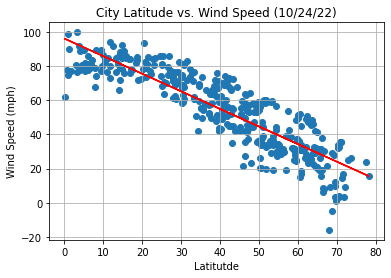

In [16]:
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
temp_lat_lin = plt.scatter(x_values, y_values)
temp_lat_wind = plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (10/24/22)")
plt.grid()
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

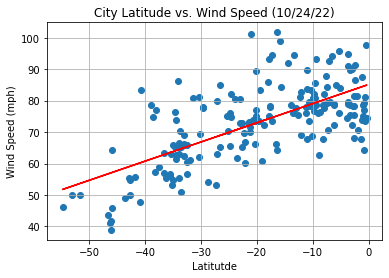

In [17]:
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
temp_lat_lin = plt.scatter(x_values, y_values)
temp_lat_wind = plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (10/24/22)")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

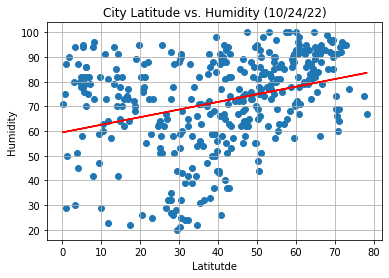

In [18]:
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
temp_lat_lin = plt.scatter(x_values, y_values)
temp_lat_wind = plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitutde")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (10/24/22)")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

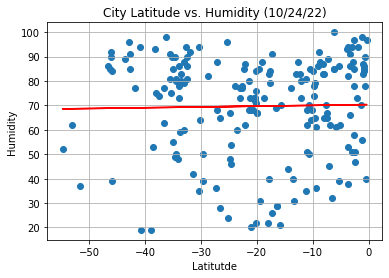

In [19]:
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
temp_lat_lin = plt.scatter(x_values, y_values)
temp_lat_wind = plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitutde")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (10/24/22)")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

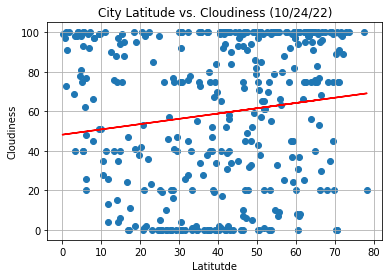

In [20]:
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
temp_lat_lin = plt.scatter(x_values, y_values)
temp_lat_wind = plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (10/24/22)")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

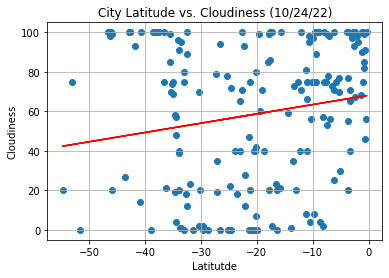

In [21]:
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
temp_lat_lin = plt.scatter(x_values, y_values)
temp_lat_wind = plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (10/24/22)")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

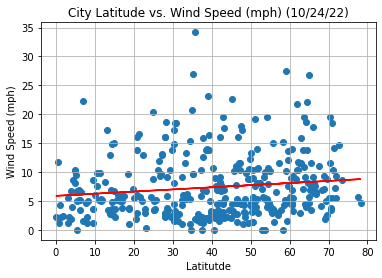

In [22]:
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
temp_lat_lin = plt.scatter(x_values, y_values)
temp_lat_wind = plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph) (10/24/22)")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

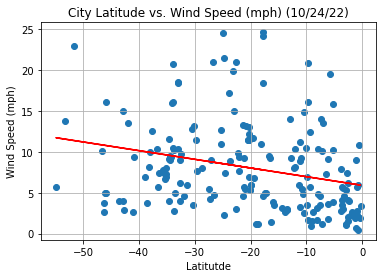

In [23]:
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
temp_lat_lin = plt.scatter(x_values, y_values)
temp_lat_wind = plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph) (10/24/22)")
plt.grid()
plt.show()